# [Jobs4All](https://repl.it/@oneonlee/Py-Day8-by-NICO)
## Challenge goals:
* Goes to http://www.alba.co.kr and scrapes the companies on the front page.
* Then go to the page of each company and scrape each job.
* Create a .csv file for each company and write the jobs on it.

* [Watch the video](https://imgur.com/nZjqUT8)
* 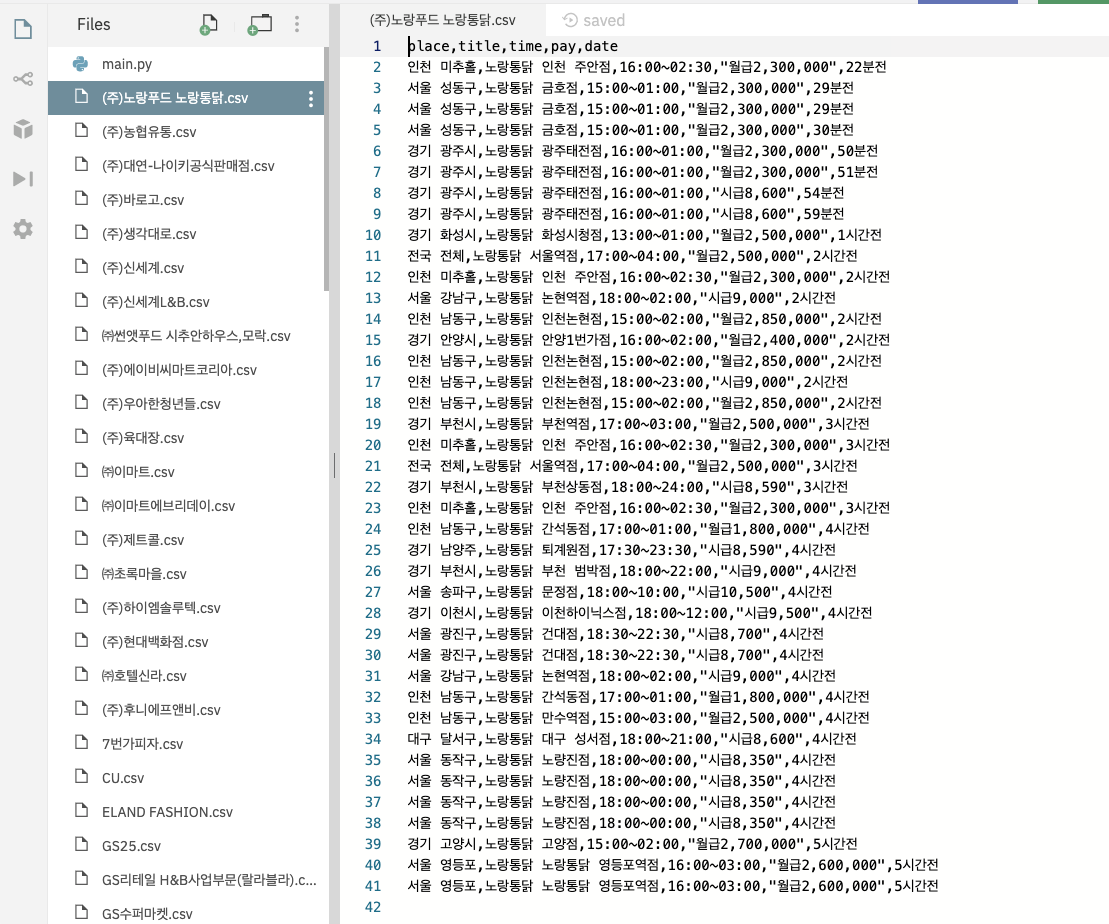

In [2]:
# https://gist.github.com/serranoarevalo/449f843adc252554d9e4a027d21ca8e2

import os
import csv
import requests
from bs4 import BeautifulSoup

os.system("clear")


def write_company(company):
    try:
      file = open(f"{company['name']}.csv", mode="w")
      writer = csv.writer(file)
      writer.writerow(["place", "title", "time", "pay", "date"])
      for job in company["jobs"]:
        writer.writerow(list(job.values()))
    except:
      pass


alba_url = "http://www.alba.co.kr"

alba_request = requests.get(alba_url)
alba_soup = BeautifulSoup(alba_request.text, "html.parser")
main = alba_soup.find("div", {"id": "MainSuperBrand"})
brands = main.find_all("li", {"class": "impact"})
for brand in brands:
    link = brand.find("a", {"class": "goodsBox-info"})
    name = brand.find("span", {"class": "company"})
    if link and name:
        link = link["href"]
        name = name.text
        company = {'name': name, 'jobs': []}
        jobs_request = requests.get(link)
        jobs_soup = BeautifulSoup(jobs_request.text, "html.parser")
        tbody = jobs_soup.find("div", {"id": "NormalInfo"}).find("tbody")
        rows = tbody.find_all("tr", {"class": ""})
        for row in rows:
            local = row.find("td", {"class": "local"})
            if local:
                local = local.text.replace(u'\xa0', ' ')
            title = row.find("td", {"class": "title"})
            if title:
                title = title.find("a").find("span", {
                    "class": "company"
                }).text.strip()
                title = title.replace(u'\xa0', ' ')
            time = row.find("td", {"class": "data"})
            if time:
                time = time.text.replace(u'\xa0', ' ')
            pay = row.find("td", {"class": "pay"})
            if pay:
                pay = pay.text.replace(u'\xa0', ' ')
            date = row.find("td", {"class": "regDate"})
            if date:
                date = date.text.replace(u'\xa0', ' ')
            job = {
                "place": local,
                "title": title,
                "time": time,
                "pay": pay,
                "date": date
            }
            company['jobs'].append(job)
        write_company(company)